# Pymaceuticals Inc.
---

### Analysis

The analysis below compares Capomulin's effectiveness in combating squamous cell carcinoma (SCC) against other available medications. 

In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

Analysis across the full dataset showed Capomulin treated mice exhibit the smallest tumor volumes with the narrowest variance across all other treatment options including the placebo. The Capomulin treatment seemed to have also allowed the largest number of observations. The Capomulin treatment comes at the hills of another substance Ramicane - treatement with the most promising results in the group. Further comparitive analysis would be necessary to determine if results offered by Capomulin are significantly different than those achieved by Ramicane. 
 

In [573]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
dataset_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
dataset_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [574]:
# Checking the number of mice.
dataset_df["Mouse ID"].count()

1893

In [575]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = dataset_df.loc[dataset_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [576]:
# Optional: Get all the data for the duplicate mouse ID and display
duplicate_mice_df = dataset_df.loc[dataset_df["Mouse ID"] == "g989"]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [577]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
#source: filtering dataframes: https://www.geeksforgeeks.org/python-pandas-dataframe-isin/
clean_dataset_df = dataset_df[dataset_df["Mouse ID"].isin(duplicate_mice)==False]
clean_dataset_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [578]:
# Checking the number of mice in the clean DataFrame.
clean_dataset_df["Mouse ID"].count()

1880

## Summary Statistics

In [579]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame without using agg function
mean_tumor_volume = clean_dataset_df["Tumor Volume (mm3)"].groupby(clean_dataset_df["Drug Regimen"]).mean()	
median_tumor_volume = clean_dataset_df["Tumor Volume (mm3)"].groupby(clean_dataset_df["Drug Regimen"]).median()
variance_tumor_volume = clean_dataset_df["Tumor Volume (mm3)"].groupby(clean_dataset_df["Drug Regimen"]).var()
std_tumor_volume = clean_dataset_df["Tumor Volume (mm3)"].groupby(clean_dataset_df["Drug Regimen"]).std()
sem_tumor_volume = clean_dataset_df["Tumor Volume (mm3)"].groupby(clean_dataset_df["Drug Regimen"]).sem()

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume, "Median Tumor Volume": median_tumor_volume, "Tumor Volume Variance": variance_tumor_volume, "Tumor Volume Std. Dev.": std_tumor_volume, "Tumor Volume St. Err.": sem_tumor_volume})
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume St. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [580]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
#source: https://www.geeksforgeeks.org/python-pandas-dataframe-agg/
# Using the aggregation method, produce the same summary statistics in a single line
clean_dataset_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

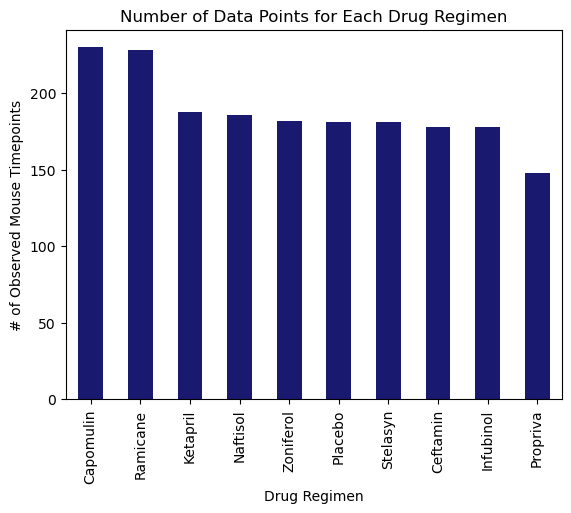

<Figure size 640x480 with 0 Axes>

In [581]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Source: 2/2In_PandasPlo--> avg_state_rain_solution
mouse_timepoints = clean_dataset_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
sorted_mouse_timepoints = mouse_timepoints.sort_values(ascending=False)
count_chart = sorted_mouse_timepoints.plot(kind="bar", title="Number of Data Points for Each Drug Regimen", color="midnightblue")
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("# of Observed Mouse Timepoints")

plt.show()
plt.tight_layout()


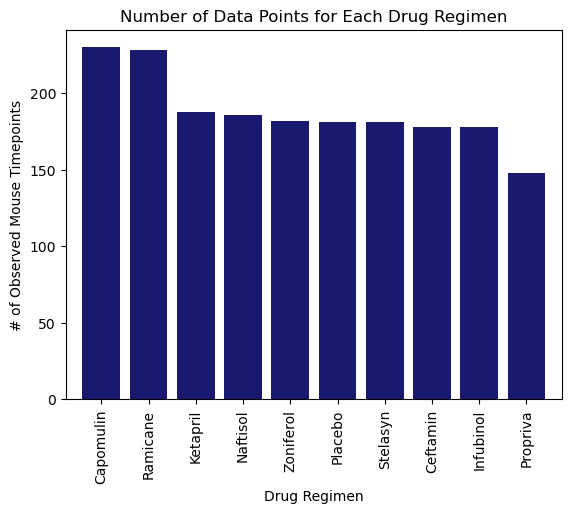

<Figure size 640x480 with 0 Axes>

In [582]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#source: 2/2-Ins_PandasPlot--> avg_state_rain_solution
x_axis = np.arange(len(mouse_timepoints))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, sorted_mouse_timepoints.index.values, rotation="vertical")
plt.bar(x_axis, sorted_mouse_timepoints, color="midnightblue", align="center")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.title("Number of Data Points for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Sex')

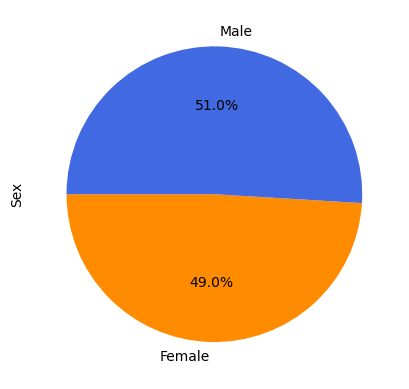

In [583]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#source: https://www.statology.org/pandas-pie-chart/
mouse_sex = clean_dataset_df.groupby(["Sex"]).count()["Mouse ID"]
colors = ["darkorange", "royalblue"]
mouse_sex_pie = mouse_sex.plot(kind="pie",y="Sex",autopct='%1.1f%%', startangle=180, colors=colors )

mouse_sex_pie.set_ylabel("Sex")


Text(0, 0.5, 'Sex')

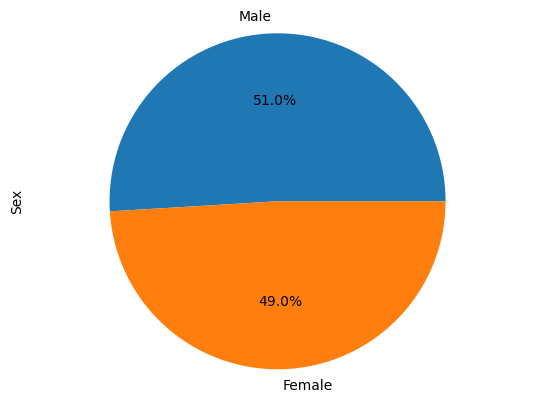

In [584]:
# Generate a pie plot showing female versus male mice using pyplot
#source: class activity: 1/09-Ins_PieCharts 
sex_counts = clean_dataset_df["Sex"].value_counts()
plt.pie(sex_counts,labels=sex_counts.index, autopct='%1.1f%%')
plt.axis("equal")
plt.ylabel('Sex')


## Quartiles, Outliers and Boxplots

In [585]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#source: https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html
narrow_group = clean_dataset_df.loc[(clean_dataset_df["Drug Regimen"] == "Capomulin") | (clean_dataset_df["Drug Regimen"] == "Ramicane") | (clean_dataset_df["Drug Regimen"] == "Infubinol") | (clean_dataset_df["Drug Regimen"] == "Ceftamin"), :]

# Start by getting the last (greatest) timepoint for each mouse ONLY for treatments Capomulin, Ramicane, Infubinol, and Ceftamin
timepoint_max = narrow_group.groupby(["Mouse ID"])["Timepoint"].max()

# Merge timepoint_max df with the clean_dataset DataFrame to get the tumor volume at the last timepoint
# source: 04- Data-Analysis-Pandas / Activity 01 Ins_Merging 

merged_df = pd.merge(timepoint_max, clean_dataset_df, on=["Mouse ID", "Timepoint"], how="left")


merged_df.head()



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [586]:
# Put treatments into a list for for loop (and later for plot labels)
#sources: 2/1 Stu_plotReview / 3/Ins_Quesrtile_and_Outliers / 
#Chat GPT helped with the loop set up 

# Put treatments into a list for for loop (and later for plot labels) 
drug_regimens = merged_df["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_list =[]
outliers = pd.DataFrame()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in drug_regimens:
    treatment_df = merged_df.loc[merged_df["Drug Regimen"] == treatment]
    
    quartiles = treatment_df["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_outliers = treatment_df.loc[
        (treatment_df["Tumor Volume (mm3)"] < lower_bound) | (treatment_df["Tumor Volume (mm3)"] > upper_bound)
    ]
    
    # add subset 
    treatment_outliers["Treatment"] = treatment
    outliers = pd.concat([outliers, treatment_outliers], ignore_index=True)
    

    # Determine outliers using upper and lower bounds
    print(f"{treatment} potential outliers: The Most Unlucky Mouse ID: {treatment_outliers['Mouse ID'].values} Tumor Volume: {treatment_outliers['Tumor Volume (mm3)'].values} Timepoint: {treatment_outliers['Timepoint'].values}")


    

Infubinol potential outliers: The Most Unlucky Mouse ID: ['c326'] Tumor Volume: [36.3213458] Timepoint: [5]
Ceftamin potential outliers: The Most Unlucky Mouse ID: [] Tumor Volume: [] Timepoint: []
Ramicane potential outliers: The Most Unlucky Mouse ID: [] Tumor Volume: [] Timepoint: []
Capomulin potential outliers: The Most Unlucky Mouse ID: [] Tumor Volume: [] Timepoint: []


C:\Users\lasot\AppData\Local\Temp\ipykernel_25408\1160798518.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatment_outliers["Treatment"] = treatment


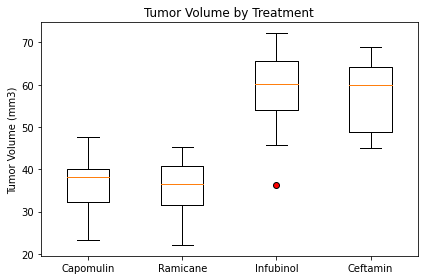

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#source: Class actitivty 3/2-Ins_Quartiles_and_Outliers
#source change outlier symbol: https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
#source: multiple plots in one axis: https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Treatment')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot([merged_df.loc[merged_df["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"],
                merged_df.loc[merged_df["Drug Regimen"] == "Ramicane", "Tumor Volume (mm3)"],
                merged_df.loc[merged_df["Drug Regimen"] == "Infubinol", "Tumor Volume (mm3)"],
                merged_df.loc[merged_df["Drug Regimen"] == "Ceftamin", "Tumor Volume (mm3)"]],
                flierprops={'marker': 'o', 'markerfacecolor': 'red'})
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.tight_layout()
plt.show()

## Line and Scatter Plots

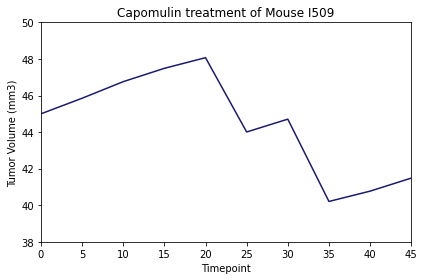

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#source: class activity 1/02 Stu_NJTemp-LinePlots

timepoints_l509 = clean_dataset_df.loc[clean_dataset_df["Mouse ID"] == "l509", "Timepoint"]

tumor_vol_l509 = clean_dataset_df.loc[clean_dataset_df["Mouse ID"] == "l509", "Tumor Volume (mm3)"]
#plot the line graph
plt.plot(timepoints_l509, tumor_vol_l509, color="midnightblue")
plt.xlim(0,45)
plt.ylim(38,50)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of Mouse I509")
plt.tight_layout()
plt.show()

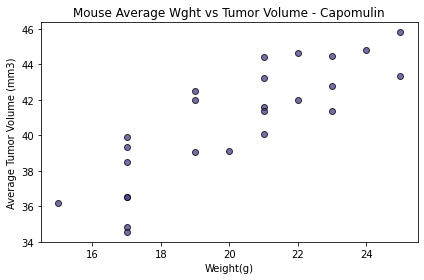

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#source class activity 1/11 Ins_Scatter_Plots

capomulin_wght = clean_dataset_df.loc[clean_dataset_df["Drug Regimen"] == "Capomulin", :].groupby("Mouse ID").mean()["Weight (g)"]
tumor_cap_vol = clean_dataset_df.loc[clean_dataset_df["Drug Regimen"] == "Capomulin", :].groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
plt.scatter(capomulin_wght, tumor_cap_vol, marker="o", facecolors="darkslateblue", edgecolors="black", alpha=0.75)
plt.title("Mouse Average Wght vs Tumor Volume - Capomulin")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.tight_layout()
plt.show()


## Correlation and Regression

The correlation between both factors is 0.84


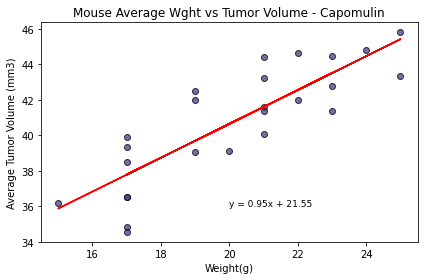

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#source: Class Activities - regression_solution.ipynb in 3/06 - Correlation conundrum 3/08-Ins_Regression 


capomulin_wght = clean_dataset_df.loc[clean_dataset_df["Drug Regimen"] == "Capomulin", :].groupby("Mouse ID").mean()["Weight (g)"]
tumor_cap_vol = clean_dataset_df.loc[clean_dataset_df["Drug Regimen"] == "Capomulin", :].groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
correlation = st.pearsonr(capomulin_wght, tumor_cap_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_wght, tumor_cap_vol)
regress_values = capomulin_wght * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capomulin_wght, tumor_cap_vol, marker="o", facecolors="darkslateblue", edgecolors="black", alpha=0.75)
plt.plot(capomulin_wght,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=9,color="black")           
plt.title("Mouse Average Wght vs Tumor Volume - Capomulin")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.tight_layout()
plt.show()